## STEP.4 Data Cleaning (No Spark)
**Data Cleaning Function (`clean_isd_lite_data`)**:
   - Iterates through JSON records and extracts relevant data such as year, month, day, hour, temperature, dew point temperature, pressure, wind direction, wind speed, cloud cover, rain 1-hour, and rain 6-hour.
   - Scales temperature, dew point temperature, pressure, rain 1-hour, and rain 6-hour values and handles missing values.

In [7]:
'''STEP.4 Data Cleaning'''
import os
import json
import numpy as np
import time

# Define data cleaning function
def clean_isd_lite_data(json_data):
    cleaned_data = []

    for record in json_data:
        cleaned_record = {}
        cleaned_record['Year'] = record['Year']
        cleaned_record['Month'] = record['Month']
        cleaned_record['Day'] = record['Day']
        cleaned_record['Hour'] = record['Hour']

        # Temperature, Dew Point Temperature, and Sea Level Pressure: Scale and handle missing values
        cleaned_record['Temperature'] = record['Temperature'] / 10.0 if record['Temperature'] != -9999 else np.nan
        cleaned_record['DewPointTemperature'] = record['Td'] / 10.0 if record['Td'] != -9999 else np.nan
        cleaned_record['Pressure'] = record['Pressure'] / 10.0 if record['Pressure'] != -9999 else np.nan

        # Wind Direction and Speed: Handle missing values
        cleaned_record['WindDirection'] = record['WindDirection'] if record['WindDirection'] != -9999 else np.nan
        cleaned_record['WindSpeed'] = record['WindSpeed'] / 10.0 if record['WindSpeed'] != -9999 else np.nan

        # Cloud Cover: Handle missing values
        cleaned_record['CloudCover'] = record['CloudCover'] if record['CloudCover'] != -9999 else np.nan

        # Precipitation: Scale and handle missing and trace values
        cleaned_record['Rain1h'] = record['Rain1h'] / 10.0 if record['Rain1h'] not in [-9999, -1] else (0 if record['Rain1h'] == -1 else np.nan)
        cleaned_record['Rain6h'] = record['Rain6h'] / 10.0 if record['Rain6h'] not in [-9999, -1] else (0 if record['Rain6h'] == -1 else np.nan)

        cleaned_data.append(cleaned_record)

    return cleaned_data

def read_and_clean_json_files(base_directory):
    # Construct the path to the conjson directory
    conjson_dir = os.path.join(base_directory, 'conjson')
    
    # Iterate through all JSON files in the conjson directory
    for filename in os.listdir(conjson_dir):
        if filename.endswith('.json'):
            file_path = os.path.join(conjson_dir, filename)
            
            # Read JSON data
            with open(file_path, 'r') as file:
                json_data = json.load(file)
            
            # Clean the data
            cleaned_data = clean_isd_lite_data(json_data)
            
            print(f"Processed {filename}")
            # Save the cleaned data as a new JSON file
            cleaned_file_path = os.path.join(conjson_dir, f"cleaned_{filename}")
            with open(cleaned_file_path, 'w') as cleaned_file:
                json.dump(cleaned_data, cleaned_file, indent=4)

if __name__ == '__main__':
    start_time = time.time()
    # Specify the base_directory path
    base_directory = '/Users/a1234/Desktop/workspace/777/GDAL/noaa_data/2014_2024_jp'
    read_and_clean_json_files(base_directory)
    # Record the end time
    end_time = time.time()
    # Calculate and print the runtime
    runtime1 = end_time - start_time
    print(f"Runtime: {runtime1} seconds")


Processed 477160-99999-2014-2014.json
Processed 477800-99999-2014-2024.json
Processed 476830-99999-2014-2024.json
Processed 476350-99999-2014-2024.json
Processed 474905-99999-2014-2024.json
Processed 477620-99999-2014-2024.json
Processed 474300-99999-2014-2024.json
Processed 475850-99999-2014-2024.json
Processed 474260-99999-2014-2024.json
Processed 478800-99999-2014-2024.json
Processed 474900-99999-2014-2024.json
Processed 477460-99999-2014-2024.json
Processed 478840-99999-2014-2014.json
Processed 474020-99999-2014-2024.json
Processed 477880-99999-2014-2024.json
Processed 477500-99999-2014-2024.json
Processed 478120-99999-2014-2024.json
Processed 478500-99999-2014-2024.json
Processed 474400-99999-2014-2024.json
Processed 476070-99999-2014-2024.json
Processed 477040-99999-2014-2024.json
Processed 476742-99999-2014-2024.json
Processed 478220-99999-2014-2024.json
Processed 476630-99999-2014-2024.json
Processed 475870-99999-2014-2024.json
Processed 475490-99999-2014-2024.json
Processed 47

## STEP.5
Loaded all JSON files starting with cleaned_ from the specified directory and merged their contents into a DataFrame. Next, basic statistical analysis of the data was done, such as calculating descriptive statistics (e.g., mean, median, standard deviation, etc.) for each variable and checking for correlations between variables. Finally the distribution of the data was viewed through visualization.

Descriptive Statistics:
               Year         Month           Day          Hour   Temperature  \
count  1.448877e+07  1.448877e+07  1.448877e+07  1.448877e+07  1.448057e+07   
mean   2.018513e+03  6.435121e+00  1.565402e+01  1.088453e+01  1.432670e+01   
min    2.014000e+03  1.000000e+00  1.000000e+00  0.000000e+00 -3.600000e+01   
25%    2.016000e+03  3.000000e+00  8.000000e+00  5.000000e+00  7.000000e+00   
50%    2.018000e+03  6.000000e+00  1.600000e+01  1.000000e+01  1.500000e+01   
75%    2.021000e+03  1.000000e+01  2.300000e+01  1.700000e+01  2.200000e+01   
max    2.024000e+03  1.200000e+01  3.100000e+01  2.300000e+01  4.020000e+01   
std    2.928325e+00  3.496082e+00  8.803827e+00  7.000186e+00  9.603626e+00   

       DewPointTemperature      Pressure  WindDirection     WindSpeed  \
count         1.446409e+07  9.888378e+06   1.396346e+07  1.447238e+07   
mean          8.991042e+00  1.014794e+03   1.939099e+02  3.121480e+00   
min          -5.340000e+01  9.518000e+02   0.

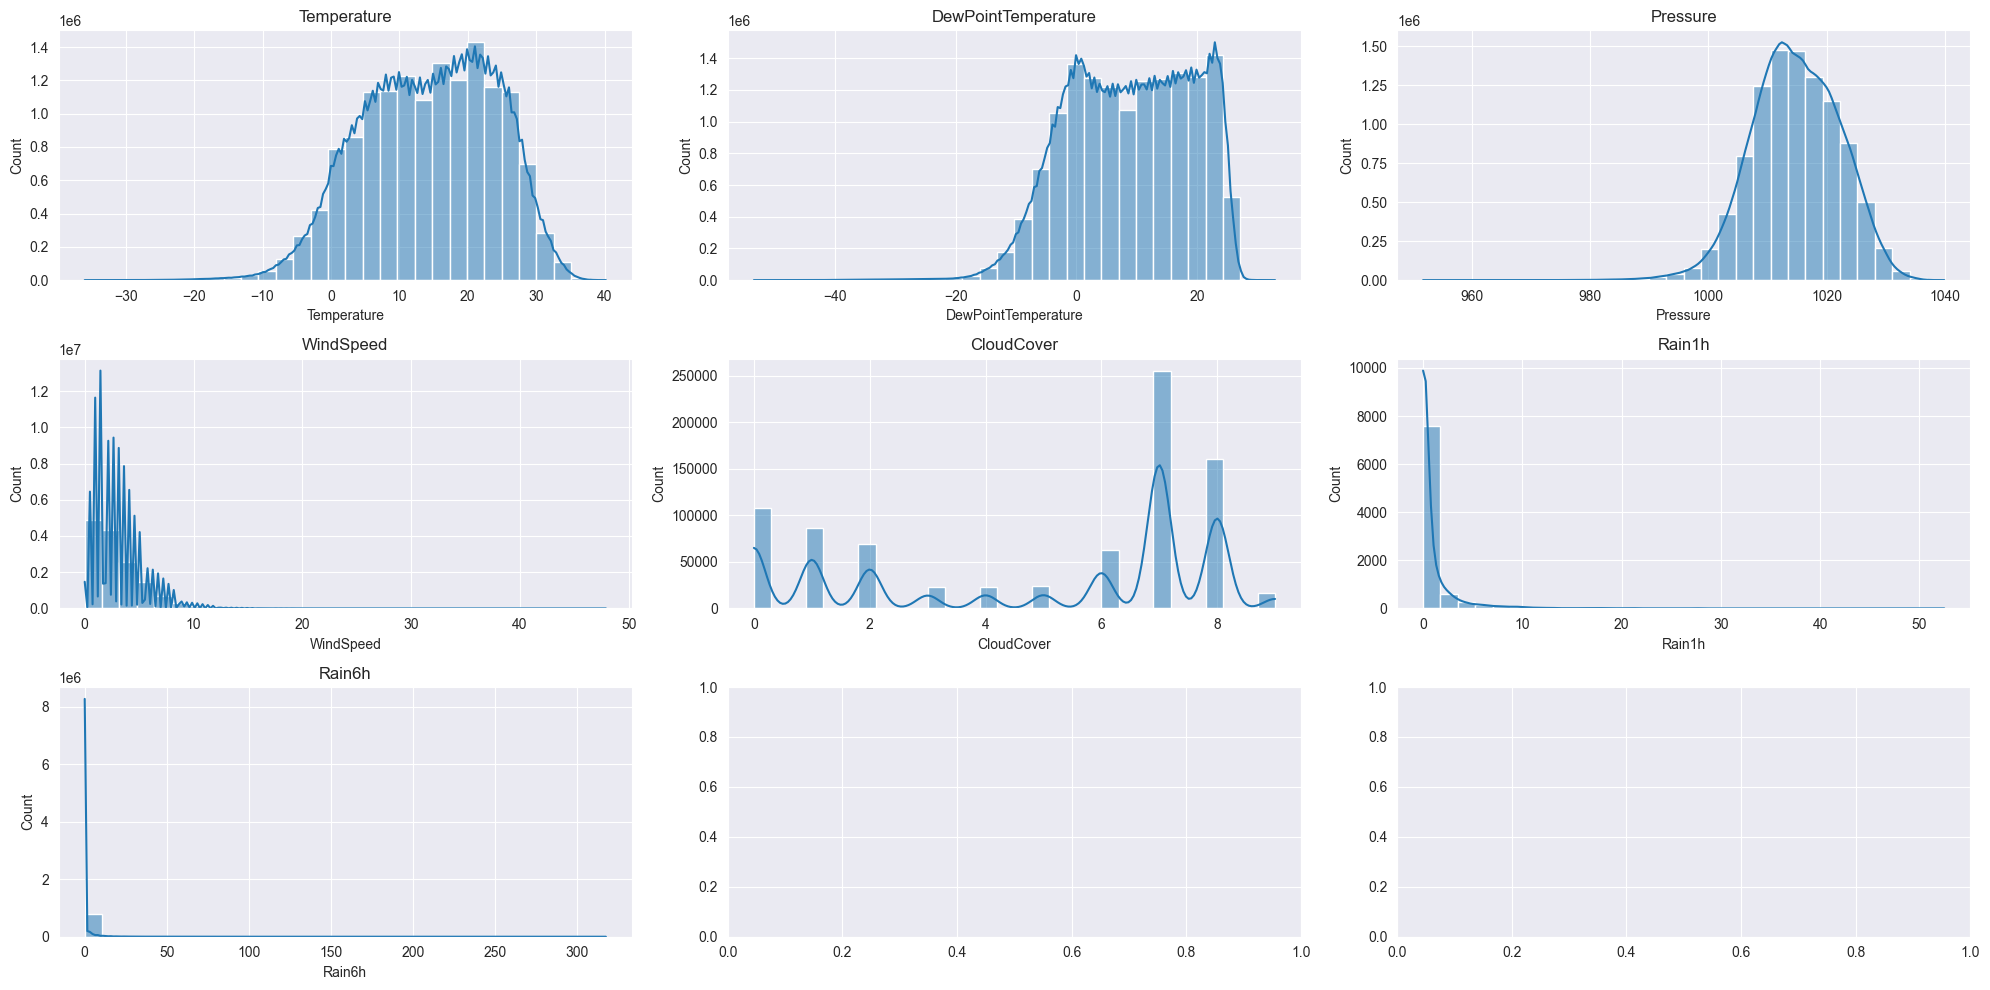

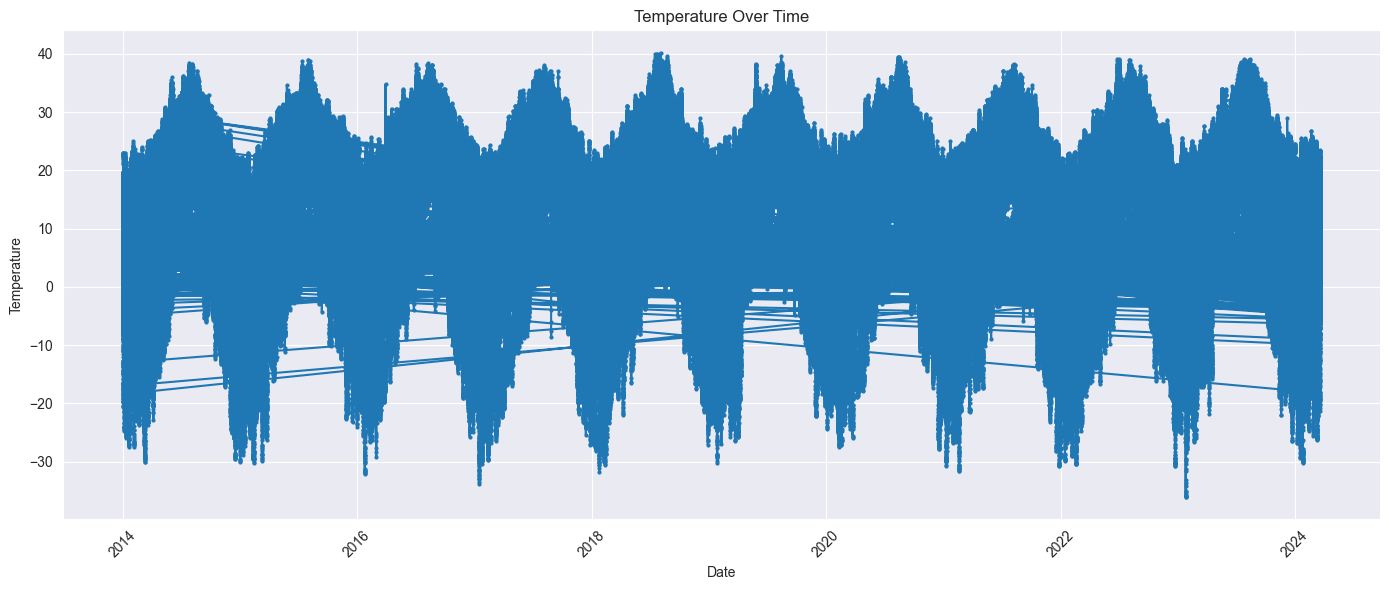

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_cleaned_data(conjson_dir):
    # Load all cleaned data into a DataFrame
    all_data = []
    for filename in os.listdir(conjson_dir):
        if filename.startswith('cleaned_') and filename.endswith('.json'):
            file_path = os.path.join(conjson_dir, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                all_data.extend(data)
    return pd.DataFrame(all_data)

def plot_histograms(data, variables, n_rows, n_cols, figsize=(20, 10)):
    # Plot histograms
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for var, ax in zip(variables, axes.flatten()):
        sns.histplot(data[var].dropna(), bins=30, kde=True, ax=ax)
        ax.set_title(var)
    plt.tight_layout()
    plt.show()

def plot_time_series(data, variable, title):
    # Plot time series
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data[variable], marker='o', linestyle='-', markersize=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_data(data):
    # Print descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe())
    
    # Compute and print correlation matrix
    print("\nCorrelation Matrix:")
    print(data.corr())

if __name__ == '__main__':
    # Specify the directory where cleaned data is located
    conjson_dir = '/Users/a1234/Desktop/workspace/777/GDAL/noaa_data/2014_2024_jp/conjson'  
    data = load_cleaned_data(conjson_dir)
    
    # Add a date column to the data for time series analysis
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
    
    # Analyze the data
    analyze_data(data)
    
    # Visualize variable histograms
    variables = ['Temperature', 'DewPointTemperature', 'Pressure', 'WindSpeed', 'CloudCover', 'Rain1h', 'Rain6h']
    plot_histograms(data, variables, n_rows=3, n_cols=3)
    
    # Plot time series, using temperature as an example
    plot_time_series(data, 'Temperature', 'Temperature Over Time')


## STEP.6 
Enter coordinates (longitude, latitude, elevation) to find the nearest 5 stations

In [32]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Load data from CSV
def load_site_data(filepath):
    df = pd.read_csv(filepath)
    # Ensure latitude, longitude, and elevation are float
    df['LATITUDE'] = df['LATITUDE'].astype(float)
    df['LONGITUDE'] = df['LONGITUDE'].astype(float)
    df['ELEVATION'] = df['ELEVATION'].astype(float)
    return df

# Function to calculate three-dimensional distance
def calculate_3d_distance(lat1, lon1, ele1, lat2, lon2, ele2):
    # Calculate horizontal distance (in kilometers)
    horizontal_distance = geodesic((lat1, lon1), (lat2, lon2)).kilometers
    # Calculate elevation difference (in meters)
    elevation_diff = ele2 - ele1
    # Convert elevation difference from meters to kilometers
    elevation_diff_km = elevation_diff / 1000
    # Calculate three-dimensional distance
    distance_3d = np.sqrt(horizontal_distance**2 + elevation_diff_km**2)
    return distance_3d

# Find the nearest sites based on 3D distance
def find_nearest_sites(df, target_location, target_elevation, top_n=5): # the nearest 5 stations
    # Calculate 3D distances to all sites
    df['THREE_DIMENSIONAL_DISTANCE'] = df.apply(
        lambda row: calculate_3d_distance(
            target_location[0], target_location[1], target_elevation,
            row['LATITUDE'], row['LONGITUDE'], row['ELEVATION']
        ), axis=1
    )
    # Sort by 3D distance and select the top_n sites
    nearest_sites = df.sort_values('THREE_DIMENSIONAL_DISTANCE').head(top_n)
    return nearest_sites[['STATION_ID', 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'THREE_DIMENSIONAL_DISTANCE']]

# Load site data
df_sites = load_site_data('/Users/a1234/Desktop/workspace/777/GDAL/jp.csv')

# Target location (latitude, longitude) and elevation (in meters)
target_location = (35.6895, 139.6917)  # Tokyo's latitude and longitude
target_elevation = 40.0  # Assumed elevation for Tokyo in meters

# Find the nearest sites
nearest_sites_df = find_nearest_sites(df_sites, target_location, target_elevation)

# Convert nearest site IDs to a list of strings with the first five characters
nearest_ids = [str(id)[:5] for id in nearest_sites_df['STATION_ID'].tolist()]
print(nearest_ids)


['47671', '47999', '47662', '47683', '47687']


## STEP.7 
Training the LSTM model (No Spark)

Epoch 1/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 3s 435us/step - loss: 0.1911 - val_loss: 0.0996
Epoch 2/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 414us/step - loss: 0.0946 - val_loss: 0.0909
Epoch 3/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - loss: 0.0892 - val_loss: 0.0893
Epoch 4/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 410us/step - loss: 0.0863 - val_loss: 0.0850
Epoch 5/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 417us/step - loss: 0.0846 - val_loss: 0.0840
Epoch 6/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 418us/step - loss: 0.0819 - val_loss: 0.0833
Epoch 7/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - loss: 0.0810 - val_loss: 0.0808
Epoch 8/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - loss: 0.0796 - val_loss: 0.0803
Epoch 9/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 426us/step - loss: 0.0794 - val_loss: 0.0794
Epoch 10/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 413us/step - loss: 0.0783 - val_loss: 0.0788
Epoch 11/20
5024/5024 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - loss: 0.0781 - val_loss: 0.0793
Epoch 12

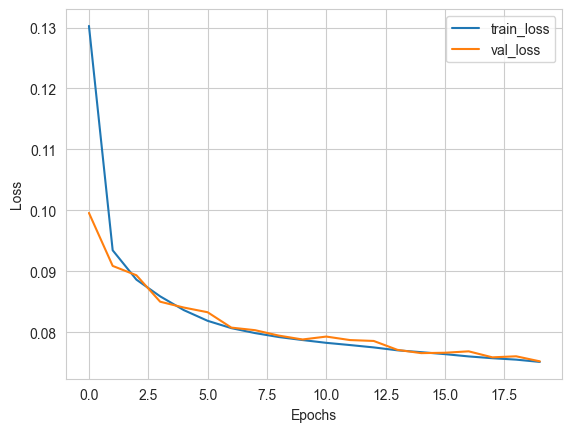

1570/1570 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


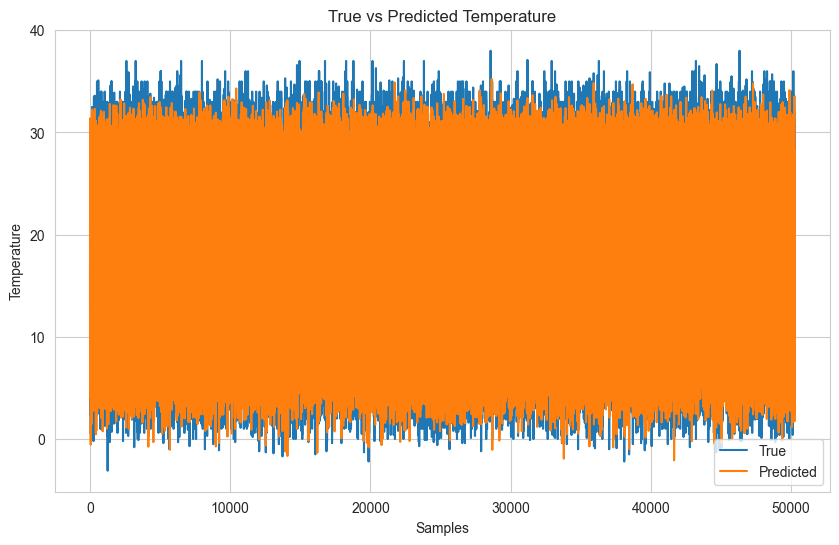

Mean Squared Error (MSE): 5.134721302888664
Mean Absolute Error (MAE): 1.710578002279279
R^2 Score: 0.9241037339782902
Total runtime: 45.050819873809814 seconds


In [12]:
import os
import json
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

# Function to prepare data
def prepare_data(conjson_dir, target_column, site_ids):
    all_data = []
    # Iterate through files in the directory
    for filename in os.listdir(conjson_dir):
        # Ensure filename starts with "cleaned_" and contains any of the specified site IDs
        if filename.startswith('cleaned_') and any(str(site_id) in filename for site_id in site_ids):
            file_path = os.path.join(conjson_dir, filename)
            # Load data from JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                all_data.extend(data)
                
    # Convert data to DataFrame
    df = pd.DataFrame(all_data)
    # Handle infinite and missing values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=[target_column], inplace=True)

    # Handle missing values in columns
    for column in df.columns:
        if df[column].isnull().any():
            if df[column].dtype in ['float64', 'int64'] and df[column].notna().any():
                # Fill missing values with mean
                df.loc[:, column] = df.loc[:, column].fillna(df[column].mean())
            else:
                # Drop columns with missing values
                df.drop(column, axis=1, inplace=True)
    
    if df.empty:
        raise ValueError("No data left after cleaning. Check your data and cleaning process.")

    return df

# Function to build the LSTM model
def build_model(input_shape):
    model = Sequential()
    # Add input layer
    model.add(Input(shape=input_shape))
    # Add LSTM layer
    model.add(LSTM(50, activation='tanh'))
    # Add output layer
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    return model

if __name__ == '__main__':
    # Set the base directory
    base_directory = '/Users/a1234/Desktop/workspace/777/GDAL/noaa_data/2014_2024_jp/conjson'
    # Define the target column
    target_column = 'Temperature'
    # Record the start time
    start_time = time.time()
    # Prepare data
    df = prepare_data(base_directory, target_column, nearest_ids)

    # Separate feature columns and target column
    feature_columns = [col for col in df.columns if col != target_column]
    X = df[feature_columns].values
    y = df[target_column].values

    # Standardize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = build_model((1, X_train.shape[2]))
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Test Loss: {loss}')

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualize predicted results
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test = scaler_y.inverse_transform(y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Temperature')
    plt.title('True vs Predicted Temperature')
    plt.legend()
    plt.show()

    # Calculate additional evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    # Record the end time
    end_time = time.time()
    # Calculate and print the runtime
    runtime = end_time - start_time
    print("=======================================================")
    print(f"Total runtime: {runtime} seconds")
    print("=======================================================")